<a href="https://colab.research.google.com/github/mchirico/COVID-19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19**

Note:  You need to make a copy of this note book, if you want to run it yourself
by clicking on "File/Save a copy in Drive"



Sharable link:
https://colab.research.google.com/drive/1RZXskxLFGTMcw7Q88VwIWk7vSceGbIkf?usp=sharing








Data From: 
[JHU CSSE](https://github.com/CSSEGISandData/COVID-19)



In [1]:
import requests
import pandas as pd
import numpy as np 
from datetime import datetime



import warnings
warnings.filterwarnings("ignore")

try:
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive
  import torch
except:
  print("Will try to install software")
  # Lines below .... Only need to be run once at the top of the notebook.
  !pip install -q matplotlib-venn
  # #   https://pypi.python.org/pypi/pydot
  !apt-get -qq install -y graphviz && pip install -q pydot
  !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
  !pip install -U -q PyDrive
  !pip install --upgrade -q gspread
  
  !pip install torchvision
  
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive





Will try to install software
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 4.1MB/s 
     |████████████████████████████████| 92kB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.7.2, but you'll have google-auth 1.15.0 which is incompatible.


In [0]:
TMP = '/tmp/data'

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://ihmecovid19storage.blob.core.windows.net/latest/ihme-covid19.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(TMP)

In [4]:
file = !find  /tmp/data -iname '*.csv'
sdate = file[0][len(TMP)+1: len(TMP)+11]
startDate = datetime.strptime(sdate,'%Y_%m_%d')
startDate

datetime.datetime(2020, 5, 23, 0, 0)

In [0]:
for f in file:
  if 'Hospitalization_all_locs.csv' in f:
    file_hospital = f
  if 'Summary' in f:
    file_summary = f


In [6]:
fh=pd.read_csv(file_hospital)
t = fh[fh['confirmed_infections'] >= 200].head()
fh[fh['confirmed_infections'] >= 20].head()


,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
91,92,Abruzzo,2020-03-13,24.68175,21.09875,29.05000,6.46365,6.20000,6.85,6.33905,6.10,6.65,0.0,0.0,0.0,7.35115,5.65000,9.80000,2.23495,2.05,2.50000,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,observed,-55.983136,observed,210.197844,21.601714,860.262891,795.779393,936.065742
92,93,Abruzzo,2020-03-14,33.27460,29.19875,38.05125,9.70195,9.35000,10.15,9.51545,9.20,9.90,0.0,0.0,0.0,11.00660,8.85000,13.80125,3.23830,3.05,3.50125,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,observed,-60.568753,observed,223.457374,24.117519,848.695401,739.792363,933.966452
93,94,Abruzzo,2020-03-15,51.65200,46.45000,57.80250,15.15925,14.65000,15.70,14.85310,14.45,15.30,1.0,1.0,1.0,18.37740,15.59875,22.35125,5.45730,5.15,5.85000,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,observed,-64.532174,observed,235.992414,28.799306,806.058091,669.315832,929.229934
94,95,Abruzzo,2020-03-16,72.65605,66.49875,79.60250,20.62715,20.04875,21.30,20.20095,19.70,20.75,1.0,1.0,1.0,22.00405,18.64750,25.95000,6.46790,6.15,6.85000,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,3.0,observed,-67.858604,observed,249.642004,35.551201,745.302092,600.619440,882.261367
95,96,Abruzzo,2020-03-17,94.91285,87.84750,102.85500,27.33420,26.65000,28.10,26.72260,26.15,27.35,2.0,2.0,2.0,25.68785,22.19875,30.30000,7.70705,7.35,8.15000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,5.0,5.0,5.0,observed,-70.582748,observed,266.190659,46.361319,684.332390,557.140811,819.442213


In [7]:
sub = [ 'allbed_mean', 'allbed_lower',
       'allbed_upper', 'ICUbed_mean', 'ICUbed_lower', 'ICUbed_upper',
       'InvVen_mean', 'InvVen_lower', 'InvVen_upper', 'deaths_mean',
       'deaths_lower', 'deaths_upper']
t.style.bar(subset=sub, color='#d65f5f')

,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
414,415,Acre,2020-05-19,223.448656,179.243750,340.172794,47.138349,40.548750,63.588807,41.599504,35.350000,57.945425,5.000000,5.000000,5.000000,38.389089,11.647500,112.547712,7.638018,3.650000,18.124428,72.000000,72.000000,72.000000,0.000000,0.000000,61.172794,40.138349,33.548750,56.588807,4.000000,4.000000,4.000000,72.001000,72.000000,72.000000,observed,-54.456756,projected,79.662378,244.342804,1877.974523,623.796040,5552.101879
415,416,Acre,2020-05-20,234.822826,165.947500,427.235948,49.788836,39.598750,76.786275,43.966929,34.100000,70.730556,4.000000,4.000000,4.000000,38.699694,11.247500,117.283333,7.682137,3.648750,18.471324,76.000000,76.000000,76.000000,0.000000,0.000000,148.235948,42.788836,32.598750,69.786275,4.000000,4.000000,4.000000,76.001000,76.000000,76.000000,projected,-54.456756,projected,80.378746,280.096387,1858.908099,611.886902,5493.197326
416,417,Acre,2020-05-21,246.935732,152.650000,525.068056,52.276316,37.550000,92.952369,46.225459,32.098750,86.066176,2.000000,2.000000,2.000000,39.146447,10.997500,117.681944,8.064957,3.248750,22.413235,78.000000,78.000000,78.000000,0.000000,0.000000,246.068056,45.276316,30.550000,85.952369,4.000000,4.000000,4.000000,80.001000,80.000000,80.000000,projected,-54.456756,projected,81.095114,309.483211,1832.259975,601.765991,5403.637944
417,418,Acre,2020-05-22,259.118438,139.995000,603.521806,55.250758,34.998750,113.292892,48.866225,29.650000,104.246078,2.000000,2.000000,2.000000,39.317584,11.398750,116.430637,8.574250,2.800000,25.301471,80.000000,80.000000,80.000000,0.000000,0.000000,324.521806,48.250758,27.998750,106.292892,4.000000,4.000000,4.000000,84.001000,84.000000,84.000000,projected,-54.456756,projected,81.811482,342.493493,1811.660978,592.915828,5329.162460
418,419,Acre,2020-05-23,272.096718,128.048750,690.115441,58.324916,32.396250,133.394118,51.596211,27.248750,121.766176,7.000000,7.000000,7.000000,39.801106,11.650000,120.848611,8.647993,2.750000,25.537010,87.000000,87.000000,87.000000,0.000000,0.000000,411.115441,51.324916,25.396250,126.394118,4.633000,3.000000,10.000000,88.634000,87.000000,94.000000,projected,-54.456756,projected,82.527851,381.705766,1800.519169,585.434152,5235.404888


In [8]:
fs=pd.read_csv(file_summary)
fs.head()

,location_name,peak_bed_day_mean,peak_bed_day_lower,peak_bed_day_upper,peak_icu_bed_day_mean,peak_icu_bed_day_lower,peak_icu_bed_day_upper,peak_vent_day_mean,peak_vent_day_lower,peak_vent_day_upper,all_bed_capacity,icu_bed_capacity,all_bed_usage,icu_bed_usage,available_all_nbr,available_icu_nbr,travel_limit_start_date,travel_limit_end_date,stay_home_start_date,stay_home_end_date,educational_fac_start_date,educational_fac_end_date,any_gathering_restrict_start_date,any_gathering_restrict_end_date,any_business_start_date,any_business_end_date,all_non-ess_business_start_date,all_non-ess_business_end_date
0,Abruzzo,2020-03-29,2020-03-29,2020-03-30,2020-03-29,2020-03-29,2020-03-30,2020-03-29,2020-03-29,2020-03-30,4270.0,153.0,3322.0,112.0,948.0,41.0,2020-03-22,2020-05-04,2020-03-11,2020-06-03,2020-03-05,NaN,2020-03-11,NaN,2020-03-11,NaN,2020-03-11,2020-04-14
1,Acre,2020-06-03,2020-05-18,2020-07-15,2020-06-03,2020-05-17,2020-07-17,2020-06-03,2020-05-17,2020-07-16,1286.0,46.0,1007.0,39.0,279.0,7.0,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN,2020-03-17,NaN,2020-03-17,NaN
2,Alabama,2020-05-12,2020-05-06,2020-06-13,2020-05-12,2020-05-11,2020-06-14,2020-05-12,2020-05-10,2020-06-12,17537.0,1525.0,11793.0,1050.0,5744.0,475.0,NaN,NaN,2020-04-04,2020-04-30,2020-03-19,NaN,2020-03-19,NaN,2020-03-19,NaN,2020-03-28,2020-04-30
3,Alagoas,2020-07-25,2020-05-18,2020-07-30,2020-07-26,2020-05-19,2020-07-30,2020-07-25,2020-05-18,2020-07-30,5227.0,309.0,4088.0,261.0,1139.0,48.0,NaN,NaN,NaN,NaN,2020-03-17,NaN,2020-03-16,NaN,2020-03-20,NaN,2020-03-20,2020-05-06
4,Alaska,2020-04-01,2020-04-01,2020-04-01,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2034.0,169.0,1351.0,115.0,683.0,54.0,2020-03-28,2020-04-24,2020-03-28,2020-04-24,2020-03-16,NaN,2020-03-24,NaN,2020-03-17,NaN,2020-03-28,2020-04-24


In [9]:
p2=pd.read_csv(file[1])
#p[p['confirmed_infections'] >= 20].head()
p2.head()


,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
0,1,Abruzzo,2019-12-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Abruzzo,2019-12-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Abruzzo,2019-12-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Abruzzo,2019-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Abruzzo,2019-12-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mobility Data




In [14]:
# Apple - needs to be updated 
#.   from: https://www.apple.com/covid19/mobility
url = 'https://storage.googleapis.com/montco-stats/applemobilitytrends.csv'
apple=pd.read_csv(url)
apple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,30.67,30.00,29.26,22.94,24.55,31.51,33.59,31.69,33.94,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23,29.36,36.00,43.69,42.61,43.11,46.13,45.78,41.59,45.39,NaN,NaN,49.19,50.20,48.30,46.78,45.51,56.09,51.12,59.04,61.14,65.34,56.11,53.39
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,35.48,39.15,34.58,27.76,27.93,36.72,34.46,35.39,34.80,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68,32.28,43.41,49.59,46.44,52.84,52.37,48.10,44.86,68.87,NaN,NaN,61.79,56.46,54.41,48.36,45.20,67.46,63.20,66.57,67.97,68.49,48.02,42.56
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23,16.44,32.01,33.63,35.13,35.56,40.25,33.82,19.82,NaN,NaN,38.87,41.01,44.34,38.29,22.01,40.01,41.34,41.53,41.52,47.52,41.34,23.81
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,17.42,18.18,18.80,17.03,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61,12.44,21.35,22.63,23.84,23.84,30.63,24.84,15.58,NaN,NaN,28.33,28.44,31.63,28.81,18.49,30.79,30.37,28.85,29.04,31.99,31.40,16.83
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,56.56,58.77,47.51,36.90,53.34,56.93,58.06,59.69,62.87,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40,48.67,58.18,62.51,64.04,66.19,71.34,67.64,50.96,63.56,NaN,NaN,71.12,77.24,79.75,65.88,72.17,73.58,75.83,76.35,81.42,82.51,65.78,74.12


In [15]:
montco = apple[(apple['region']=='Montgomery County') & (apple['sub-region']=='Pennsylvania')]
montco

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24
2868,county,Montgomery County,driving,NaN,Pennsylvania,United States,100.0,105.78,106.53,107.73,123.4,85.88,87.63,102.49,99.64,103.47,104.6,119.09,114.12,81.82,94.53,102.46,102.33,108.57,118.07,114.4,76.35,94.06,99.4,100.69,104.58,114.25,115.58,87.66,97.63,102.97,106.81,124.33,134.73,121.15,...,49.81,50.67,56.34,51.6,45.22,51.62,48.63,54.88,53.19,57.04,62.76,38.9,52.16,60.83,58.62,55.65,72.99,70.8,55.94,63.74,67.49,64.22,74.62,77.81,74.78,62.08,NaN,NaN,79.14,80.2,96.19,88.12,68.82,80.04,85.43,86.98,92.98,95.55,79.93,71.39


In [16]:
montco = apple[(apple['region']=='Montgomery County') & (apple['sub-region']=='Pennsylvania')]
n=pd.melt(montco, id_vars=['region'], value_vars=montco.columns[6::])
n.columns = ['region', 'timeStamp', 'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
n.head()

,region,timeStamp,value
0,Montgomery County,2020-01-13,100.00
1,Montgomery County,2020-01-14,105.78
2,Montgomery County,2020-01-15,106.53
3,Montgomery County,2020-01-16,107.73
4,Montgomery County,2020-01-17,123.40


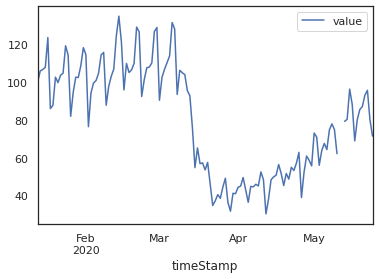

In [17]:
n.plot.line(x='timeStamp',y='value');

## DescartesLabs
Data for Mobility Changes in Response to COVID-19
https://github.com/descarteslabs/DL-COVID-19

In [18]:
url = 'https://github.com/descarteslabs/DL-COVID-19/raw/master/DL-us-m50.csv'
mobility=pd.read_csv(url)
mobility.head()

,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23
0,US,1,Alabama,NaN,1.0,8.331,10.398,10.538,10.144,10.982,13.024,11.373,8.513,10.901,10.892,10.954,11.755,12.269,9.379,6.384,9.490,8.263,7.662,7.863,8.325,5.233,2.903,5.398,5.519,6.305,6.363,6.956,4.772,2.739,5.148,4.490,5.619,5.876,6.624,4.241,...,5.278,5.441,5.958,6.255,7.167,5.253,0.523,6.577,6.623,4.972,7.584,5.287,3.543,6.562,6.961,6.012,8.114,9.946,7.787,6.562,8.030,8.695,10.192,9.170,9.015,8.331,7.116,8.113,9.253,8.275,8.451,9.478,8.529,5.850,8.206,8.324,9.386,10.121,11.027,8.658
1,US,2,Alabama,Autauga County,1001.0,7.194,14.587,13.865,13.880,14.659,17.066,11.562,8.510,15.882,14.429,14.484,15.707,15.103,8.297,5.488,11.726,10.317,9.624,8.482,9.838,4.694,2.271,6.438,7.030,6.912,6.731,7.601,4.540,2.633,5.896,5.196,6.278,6.230,7.470,4.006,...,6.356,5.348,6.241,6.668,8.193,5.079,0.060,7.013,6.738,5.146,7.730,5.138,3.726,7.453,7.694,5.920,7.977,11.106,6.922,5.568,8.019,10.593,11.105,11.257,11.474,7.704,5.914,8.067,9.676,9.847,9.427,10.582,7.993,4.852,8.958,8.372,10.721,11.162,11.203,7.898
2,US,2,Alabama,Baldwin County,1003.0,9.780,12.042,11.481,10.879,12.381,13.789,11.481,9.971,11.566,11.936,12.102,12.588,13.547,10.871,9.601,9.538,8.747,8.510,8.580,11.389,6.710,4.281,6.645,6.422,6.630,6.618,7.402,5.500,3.148,5.241,4.999,6.054,5.954,6.758,4.392,...,5.877,5.934,6.382,6.421,6.938,5.206,2.020,7.040,7.158,4.427,8.429,6.530,5.015,7.190,7.500,6.199,8.284,9.638,8.173,9.260,8.697,8.972,10.556,9.168,9.892,8.489,10.123,8.952,9.384,8.530,8.373,9.045,9.158,9.074,8.956,8.538,9.680,10.134,11.373,9.164
3,US,2,Alabama,Barbour County,1005.0,8.348,10.004,9.267,6.517,8.247,11.002,13.146,7.382,9.166,8.668,9.596,11.567,11.258,9.522,5.416,9.632,8.556,7.252,7.009,7.459,6.228,3.624,6.060,6.743,6.645,7.015,7.994,5.284,4.850,6.412,5.479,5.840,5.495,6.155,5.184,...,4.716,4.762,5.049,5.833,6.300,5.421,0.665,6.662,7.302,4.647,7.358,6.100,4.848,6.513,8.080,5.889,8.377,10.412,8.561,7.645,8.298,10.742,9.129,9.204,8.352,9.165,6.524,7.911,8.506,8.050,7.912,11.114,8.650,6.400,8.556,9.064,9.768,8.837,11.717,8.039
4,US,2,Alabama,Bibb County,1007.0,13.008,23.076,24.164,22.768,26.944,32.374,27.175,12.452,29.973,24.206,27.877,26.126,29.176,17.004,13.342,16.496,17.370,19.282,18.225,18.496,6.752,3.581,8.878,12.335,13.569,11.518,13.157,8.580,4.140,10.346,9.363,10.754,10.873,14.236,7.384,...,10.603,12.359,12.150,13.478,13.482,10.920,0.991,14.424,12.939,8.542,18.094,8.804,5.499,14.712,14.728,9.465,13.356,17.084,11.018,9.173,14.064,14.789,19.972,19.894,17.752,14.541,10.360,15.391,16.502,17.109,14.124,17.356,14.106,8.257,13.994,14.117,17.412,18.211,22.685,15.278


In [19]:
t=mobility
t[(t['admin1']=='Pennsylvania') & (t['admin2']=='Montgomery County')]

,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23
1993,US,2,Pennsylvania,Montgomery County,42091.0,3.889,6.281,6.27,6.44,6.87,6.783,5.468,3.867,6.228,6.283,6.411,6.144,4.714,2.672,1.192,2.708,1.253,1.077,0.922,1.728,0.072,0.042,0.035,0.049,0.035,0.11,0.244,0.026,0.028,0.041,0.038,0.053,0.062,0.065,0.041,...,0.029,0.056,0.054,0.048,0.097,0.036,0.038,0.06,0.23,0.177,0.084,0.344,0.025,0.079,0.569,0.337,0.058,0.885,1.002,0.271,0.204,0.333,0.239,0.263,0.151,0.074,0.218,0.043,0.131,0.086,0.104,1.194,1.141,0.209,0.511,0.272,1.125,1.756,1.79,0.489


In [20]:
n=pd.melt(mobility, id_vars=['fips'], value_vars=mobility.columns[5::])

n.columns = ['fips', 'timeStamp', 'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

n.head()

,fips,timeStamp,value
0,1.0,2020-03-01,8.331
1,1001.0,2020-03-01,7.194
2,1003.0,2020-03-01,9.780
3,1005.0,2020-03-01,8.348
4,1007.0,2020-03-01,13.008


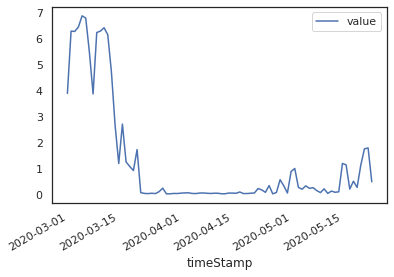

In [21]:
n[n['fips']==42091.0].plot.line(x='timeStamp',y='value');


## Google Mobility

https://www.google.com/covid19/mobility/index.html?hl=en

In [22]:
import random
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=57b4ac4fc{}40528e2a'.format(random.uniform(0,200))
gmobility=pd.read_csv(url)
gmobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


# Reading Johns Hopkins

#### Read in Confirmed Cases

In [23]:
# 
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
d=pd.read_csv(url)
d.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152,152,152,154,154,154,154,154,154,165,165,165,166,166
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19,19,19,19,21,21,21,21,21,22,22,22,22,22
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189,3260
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69


In [24]:
PERIODS = 7

c=d
cols = d.columns[10:11].tolist() + d.columns[11::].tolist()
cols
c=c[cols]
c=c.set_index('Combined_Key')
x=c.diff(axis=1,periods=PERIODS)
x=x.reset_index()
c=c.diff(axis=1)

c=c.reset_index()
c

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,"American Samoa, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Guam, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0
2,"Northern Mariana Islands, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,"Puerto Rico, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,25.0,50.0,95.0,39.0,46.0,-46.0,164.0,-140.0,31.0,64.0,18.0,11.0,33.0,106.0,36.0,182.0,51.0,35.0,81.0,44.0,63.0,125.0,17.0,25.0,58.0,43.0,30.0,98.0,115.0,47.0,57.0,64.0,95.0,61.0,47.0,117.0,70.0,89.0,71.0
4,"Virgin Islands, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,"Central Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,-1.0,0.0,0.0
3257,"Southeast Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,-2.0,1.0,2.0,-4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0
3258,"Southwest Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,66.0,4.0,0.0,0.0,6.0,5.0,2.0,4.0,2.0,2.0,2.0,5.0,3.0,2.0,8.0,8.0,2.0,7.0,4.0,6.0,17.0,9.0,6.0,-3.0,13.0,7.0,13.0,9.0,10.0,17.0,9.0,15.0,11.0,10.0,13.0,11.0,19.0
3259,"TriCounty, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.

In [25]:
x.head()

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,"American Samoa, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Guam, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,6.0,3.0,3.0,3.0,3.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0,4.0,4.0,4.0,4.0,8.0,4.0,6.0,6.0,6.0,6.0,7.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,13.0,11.0,11.0,12.0,12.0
2,"Northern Mariana Islands, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,2.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0
3,"Puerto Rico, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,360.0,343.0,330.0,316.0,349.0,375.0,278.0,373.0,208.0,189.0,158.0,137.0,102.0,181.0,123.0,299.0,450.0,437.0,454.0,524.0,535.0,492.0,581.0,416.0,390.0,413.0,375.0,361.0,396.0,386.0,416.0,448.0,454.0,506.0,537.0,486.0,488.0,511.0,543.0,550.0
4,"Virgin Islands, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,4.0,4.0,4.0,3.0,12.0,12.0,11.0,9.0,9.0,9.0,9.0,0.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
n=pd.melt(x, id_vars=['Combined_Key'], value_vars=x.columns[2::])
n.columns = ['Country/Region', 'timeStamp',  'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
n.head()

,Country/Region,timeStamp,value
0,"American Samoa, US",2020-01-23,NaN
1,"Guam, US",2020-01-23,NaN
2,"Northern Mariana Islands, US",2020-01-23,NaN
3,"Puerto Rico, US",2020-01-23,NaN
4,"Virgin Islands, US",2020-01-23,NaN


## N is smoother

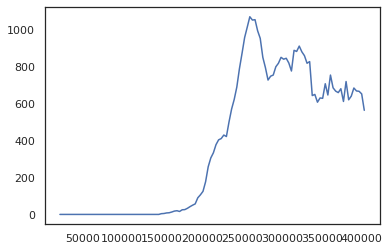

In [27]:

regions = ['Montgomery, Pennsylvania, US']
for region in regions:
  z= n[n['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line(x='timeStamp',y='value');

In [28]:
m=pd.melt(c, id_vars=['Combined_Key'], value_vars=c.columns[2::])
m.columns = ['Country/Region', 'timeStamp',  'value']
m['timeStamp'] = m['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
m.head()

,Country/Region,timeStamp,value
0,"American Samoa, US",2020-01-23,0.0
1,"Guam, US",2020-01-23,0.0
2,"Northern Mariana Islands, US",2020-01-23,0.0
3,"Puerto Rico, US",2020-01-23,0.0
4,"Virgin Islands, US",2020-01-23,0.0


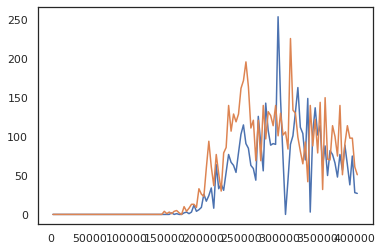

In [29]:
regions = ['Bucks, Pennsylvania, US','Montgomery, Pennsylvania, US']
for region in regions:
  z= m[m['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line();

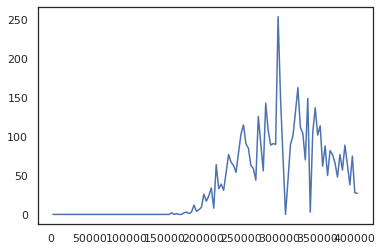

In [30]:
regions = ['Bucks, Pennsylvania, US']
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line();

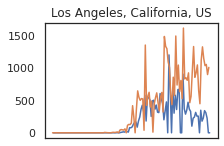

In [31]:
regions = ['Philadelphia, Pennsylvania, US']
regions = ['Potter, Texas, US']
regions = ['Dallas, Texas, US']
#regions = ['New York City, New York, US']
regions = ['Los Angeles, California, US']
regions = ['Philadelphia, Pennsylvania, US','Los Angeles, California, US']
fig=plt.figure()
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line(title=region,xticks=[],ax=fig.add_axes((0.05,0.5,0.4,0.4)));
plt.show()

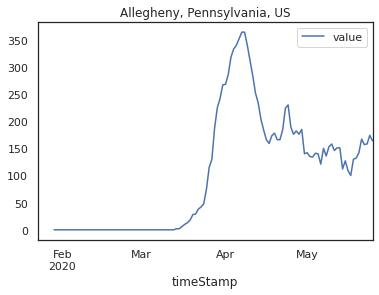

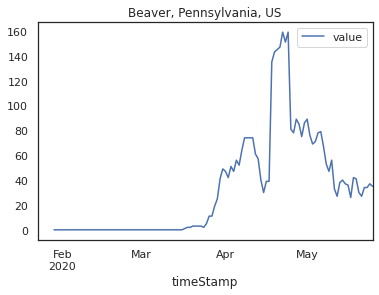

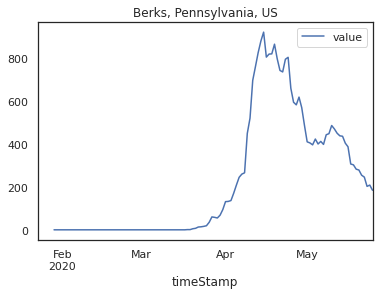

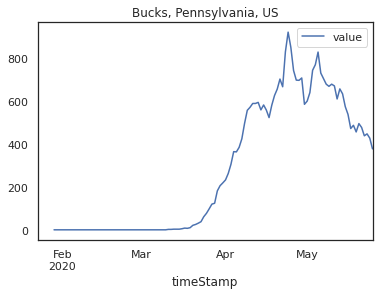

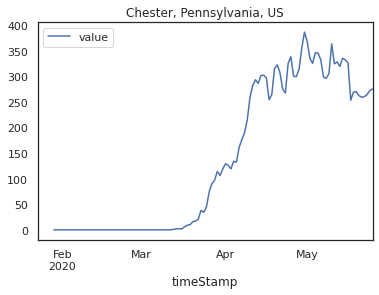

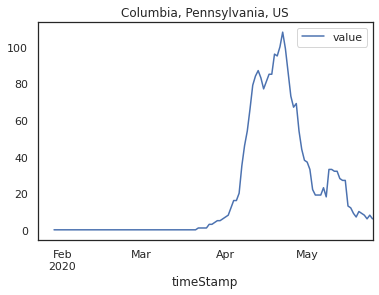

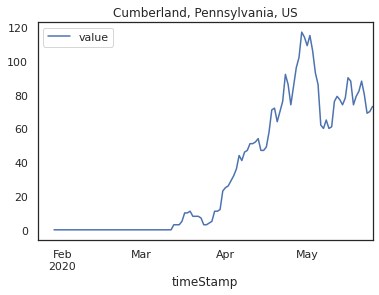

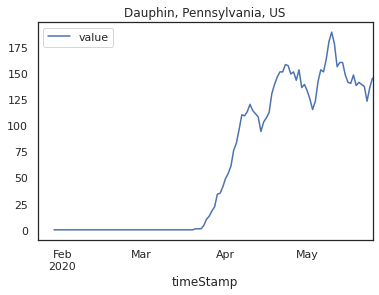

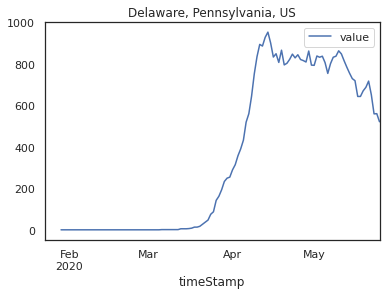

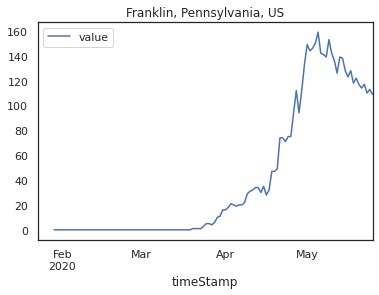

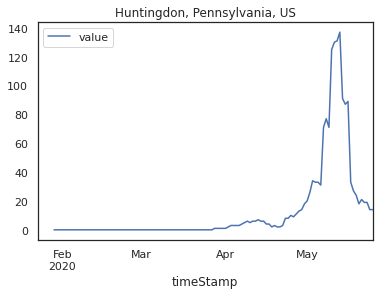

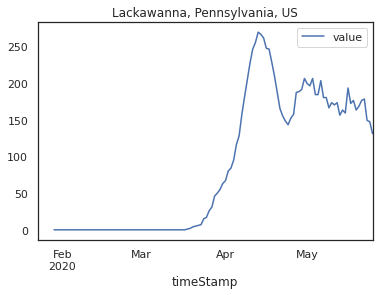

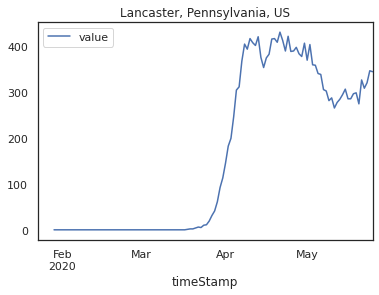

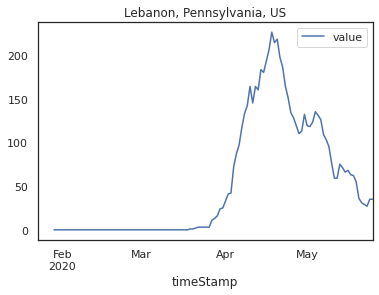

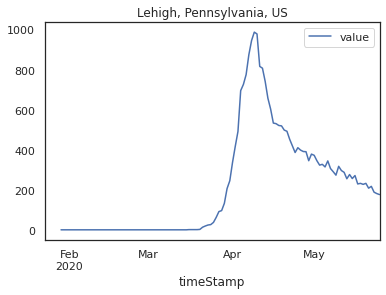

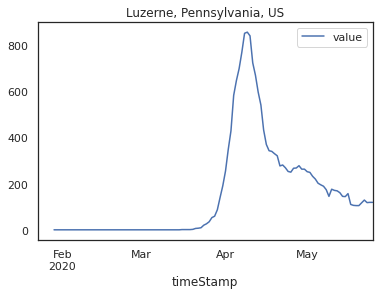

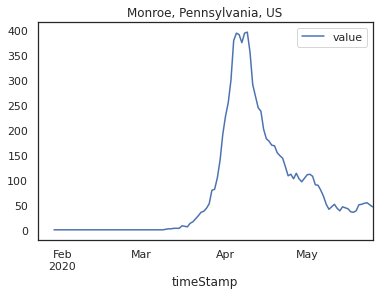

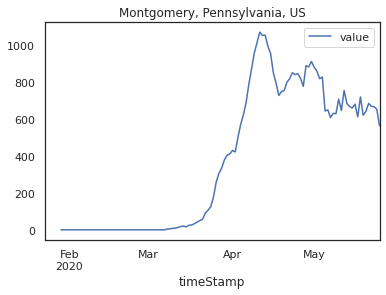

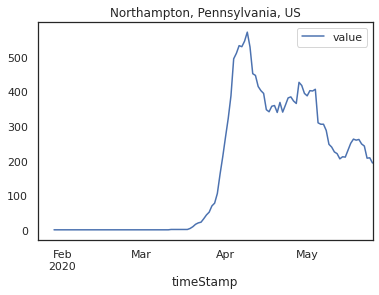

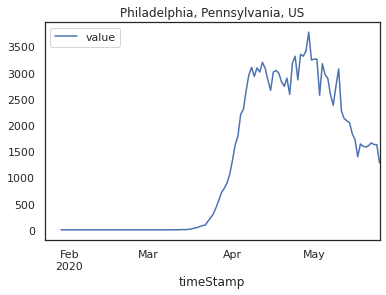

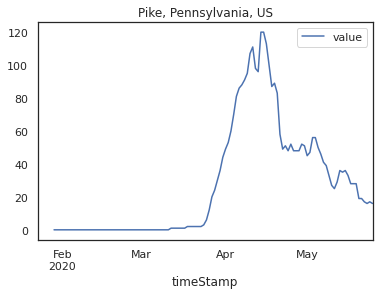

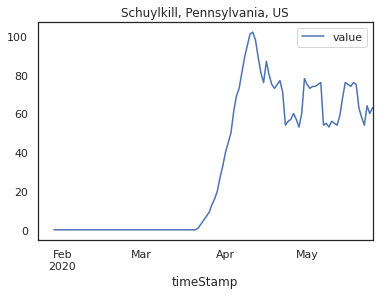

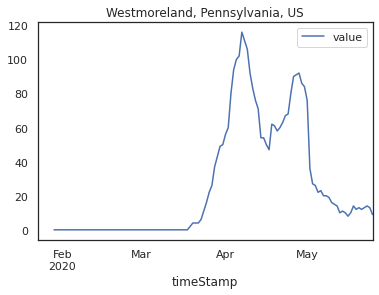

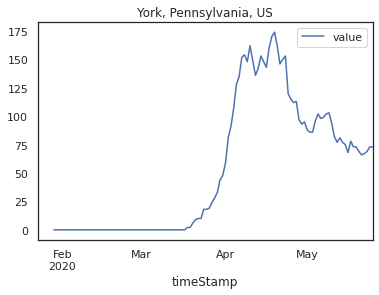

In [34]:
import matplotlib.pyplot as plt


t = n[(n['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
  try:
    group.plot(x='timeStamp', y='value', title=title)
  except:
    print('title',title)

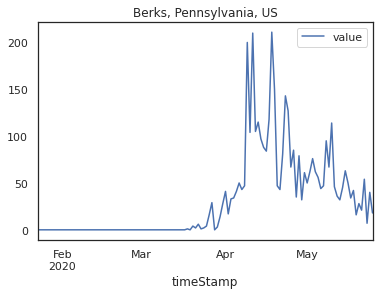

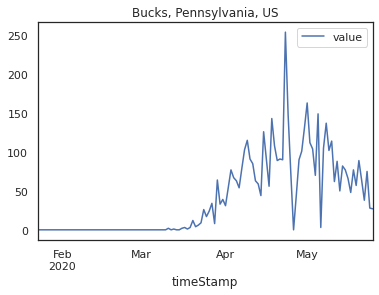

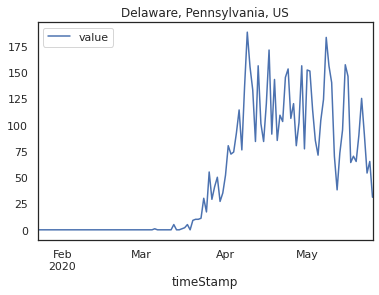

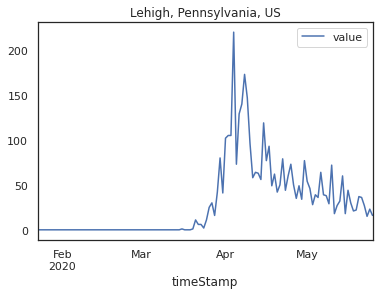

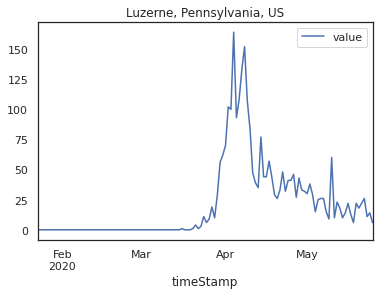

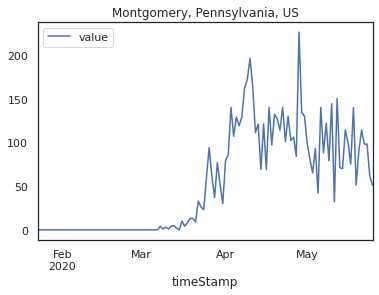

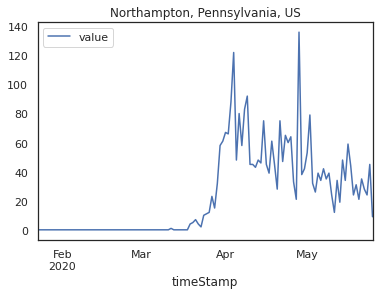

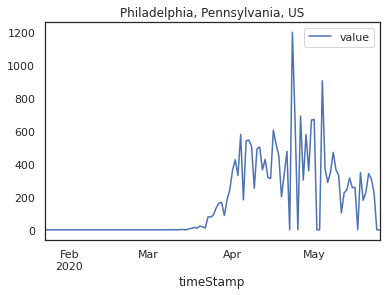

In [35]:
import matplotlib.pyplot as plt


t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

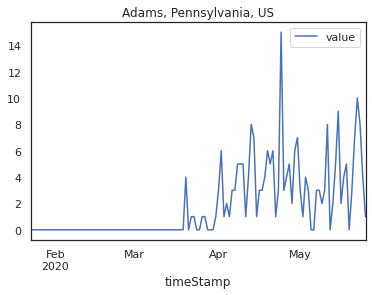

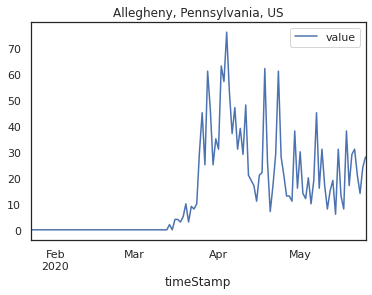

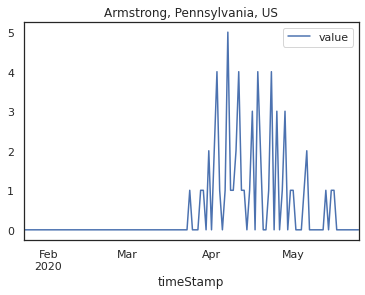

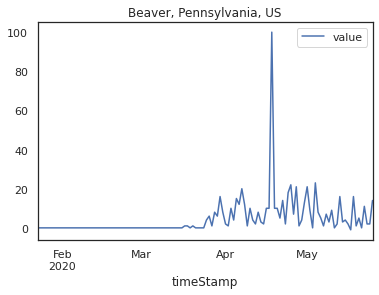

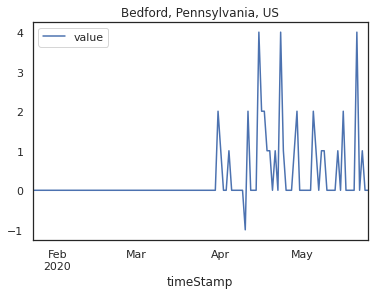

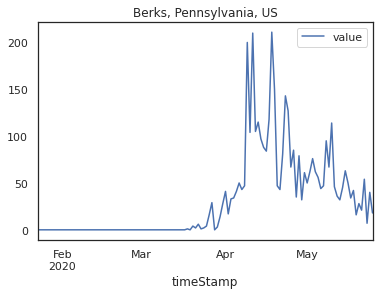

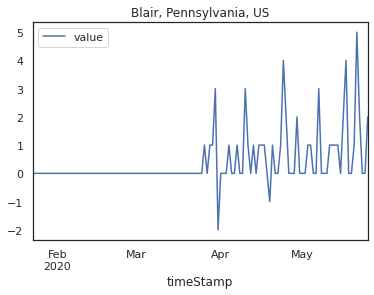

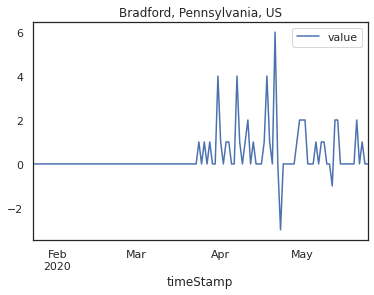

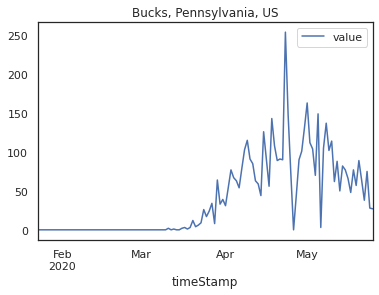

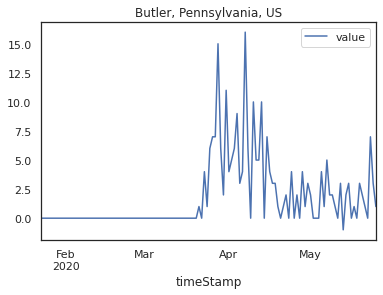

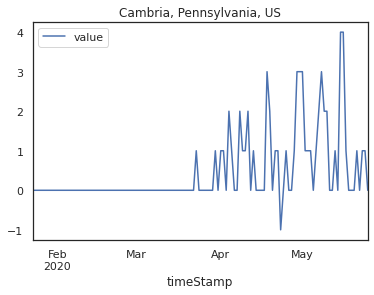

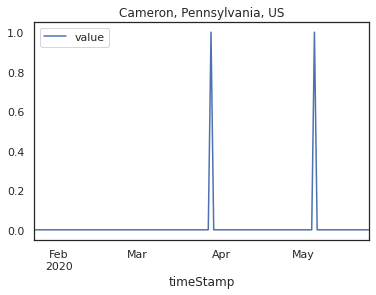

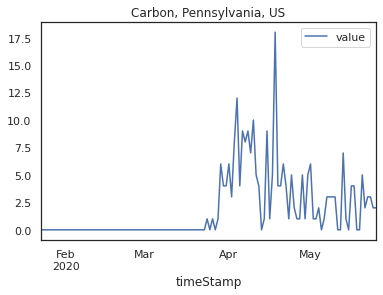

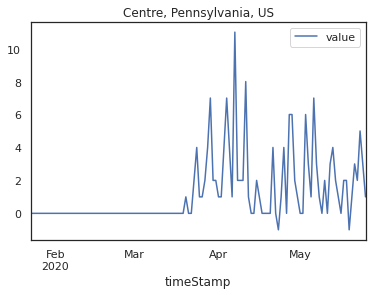

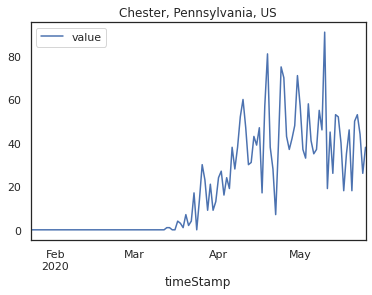

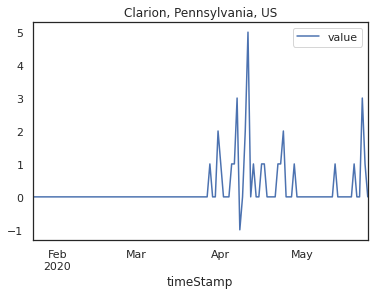

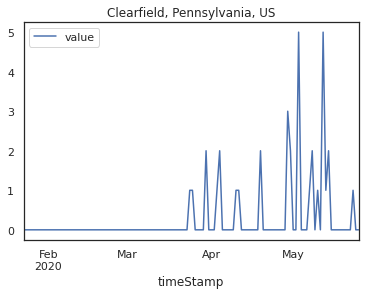

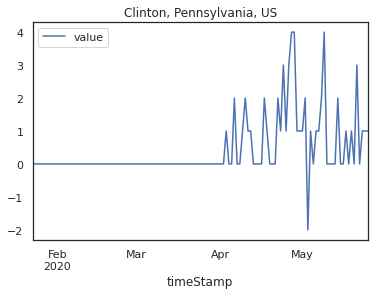

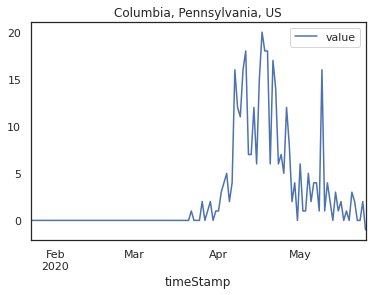

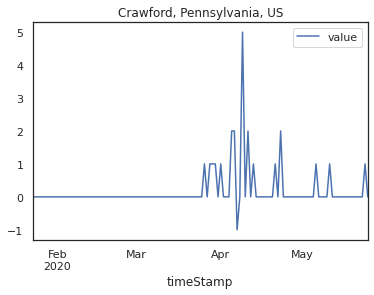

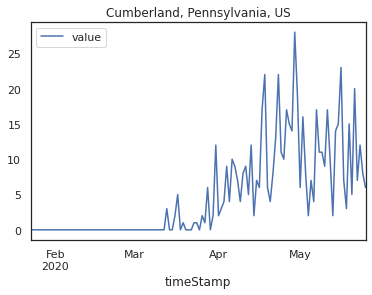

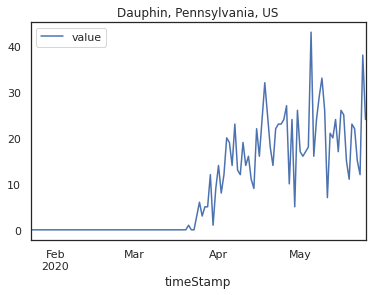

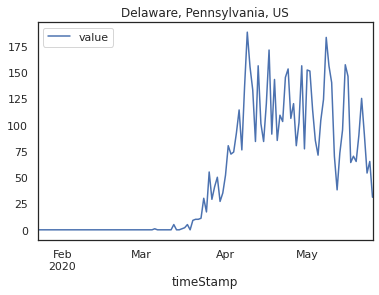

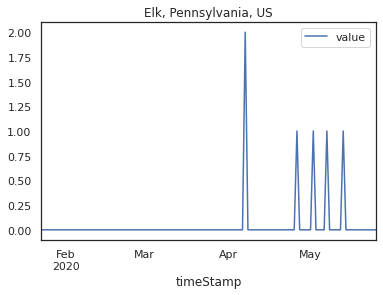

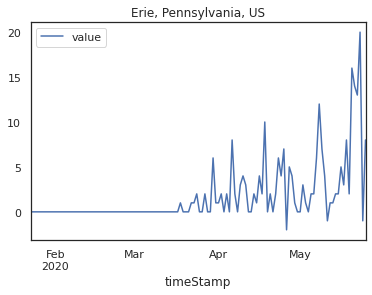

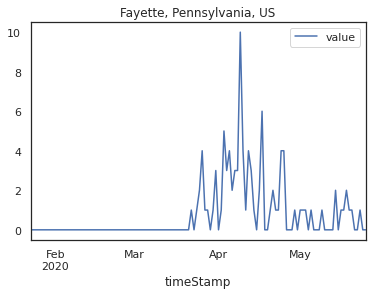

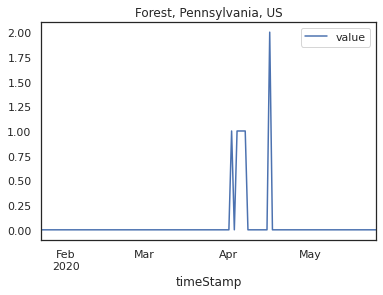

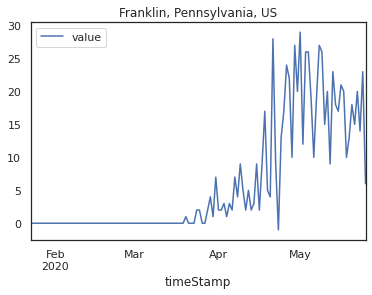

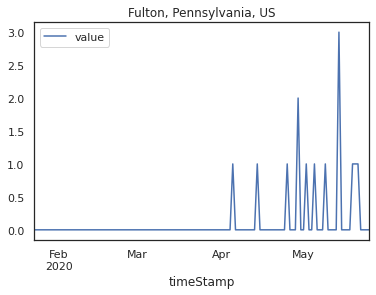

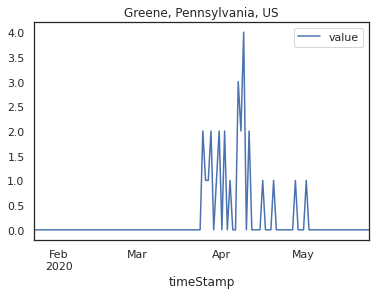

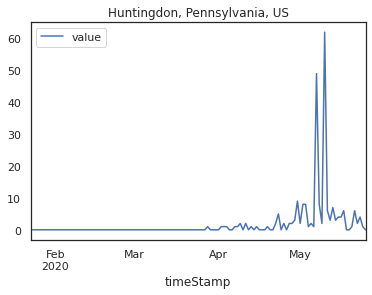

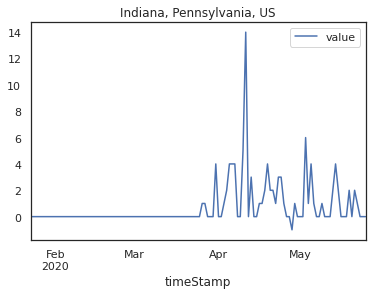

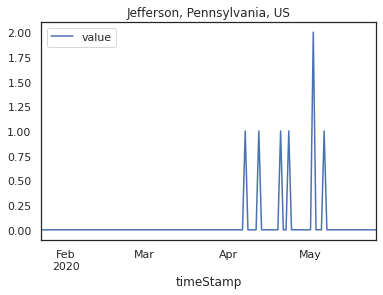

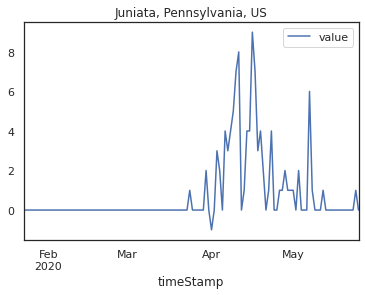

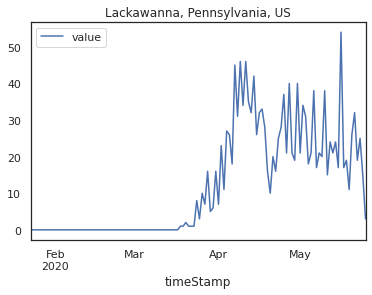

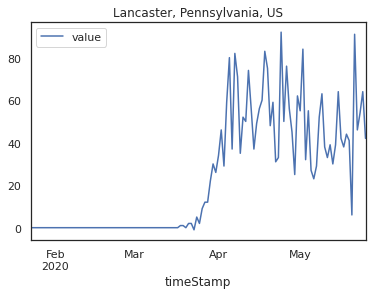

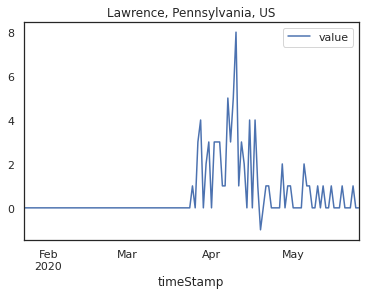

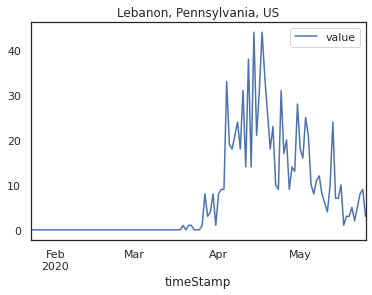

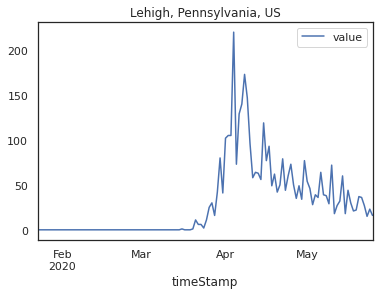

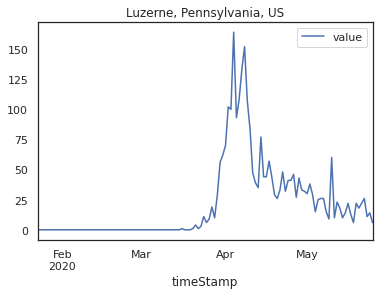

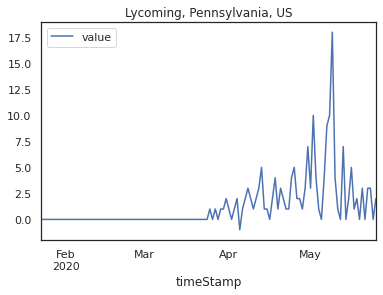

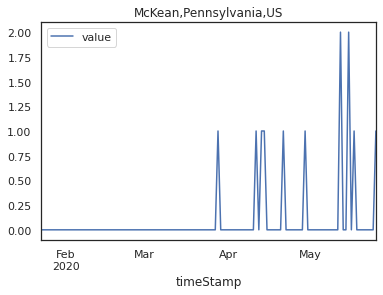

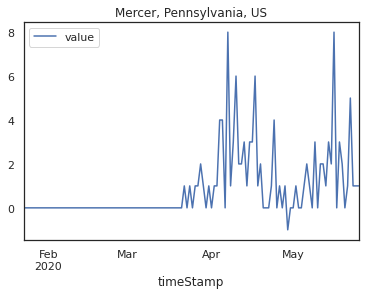

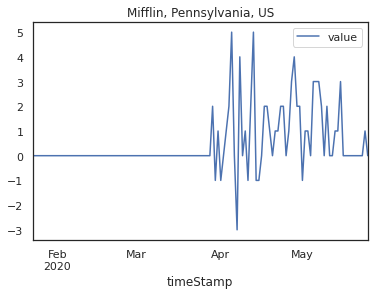

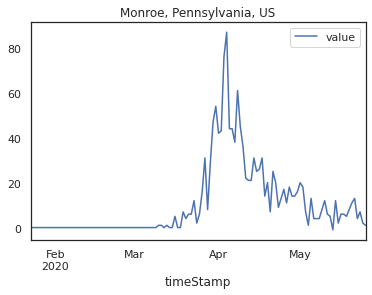

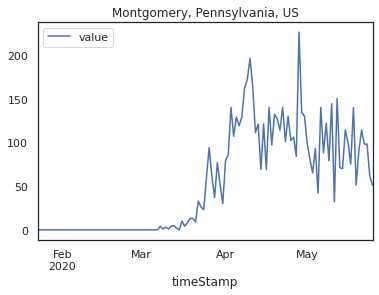

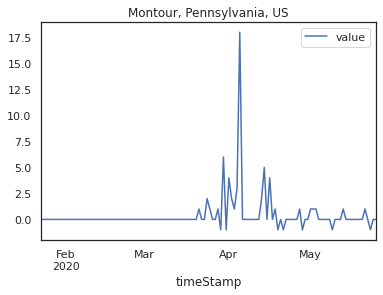

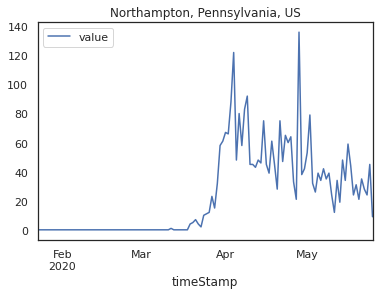

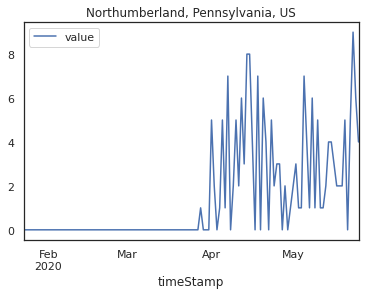

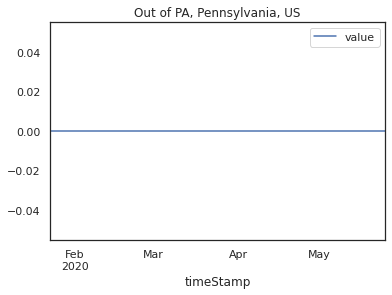

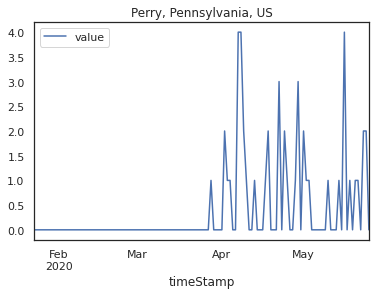

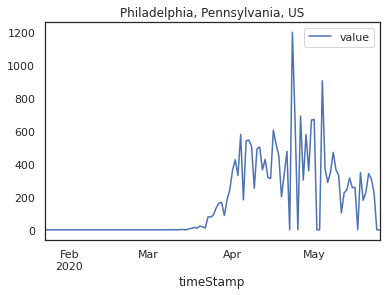

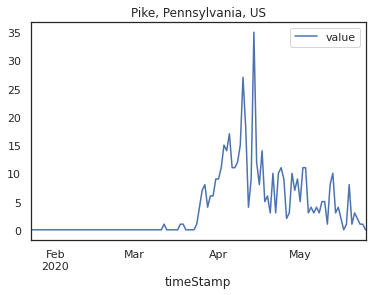

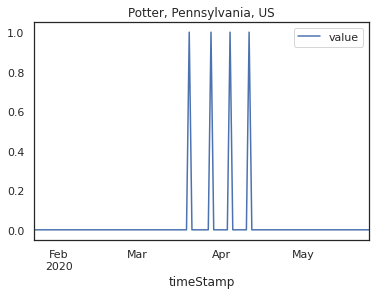

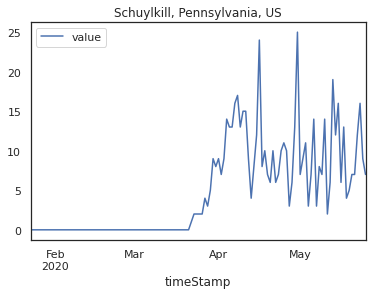

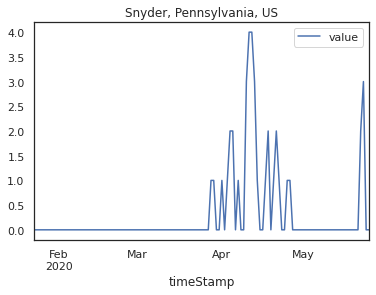

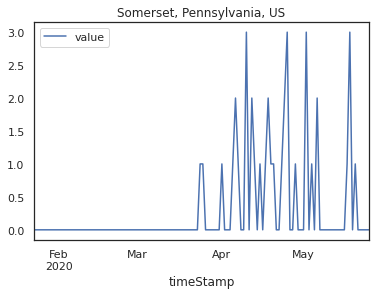

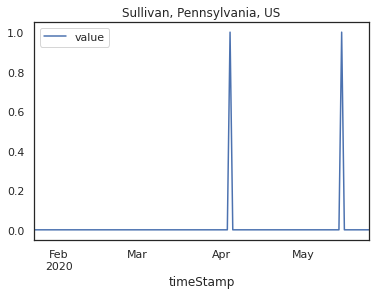

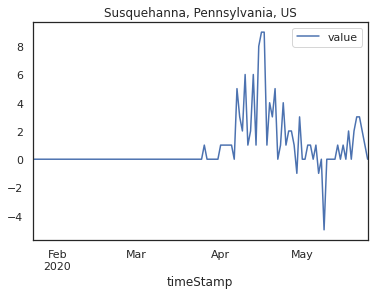

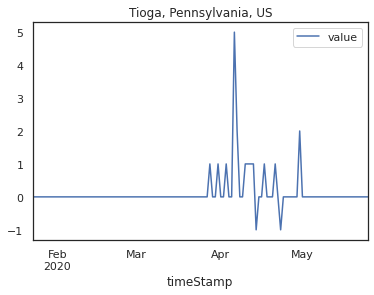

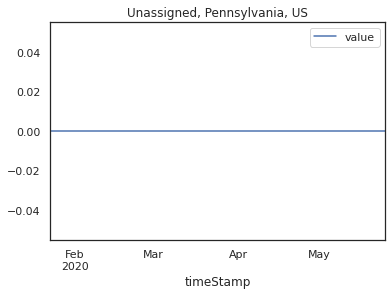

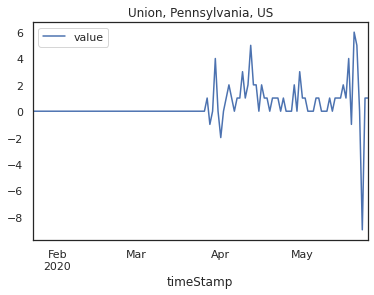

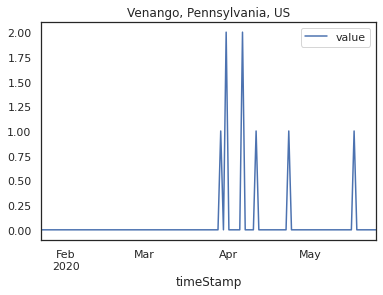

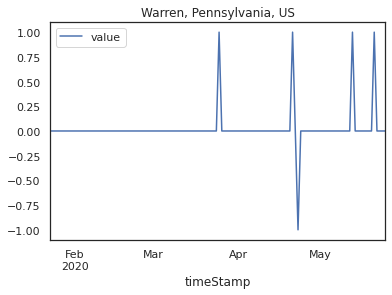

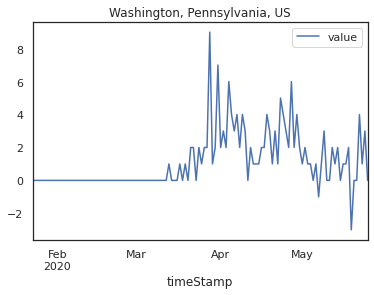

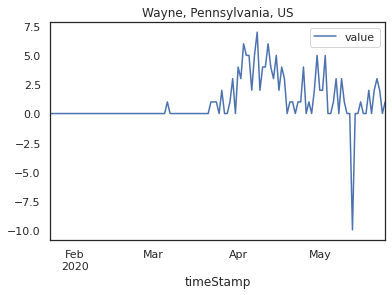

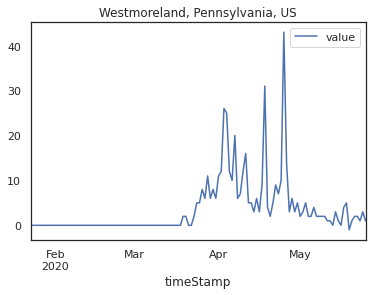

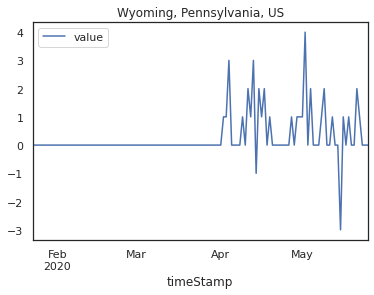

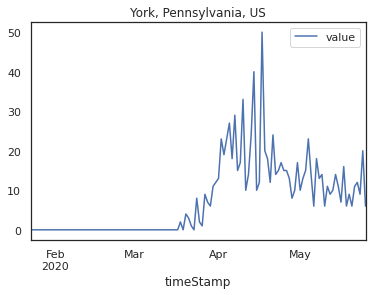

In [36]:
import matplotlib.pyplot as plt
t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

In [37]:
delta_days = 20

from datetime import date, timedelta
dt = date.today() - timedelta(delta_days)
dt.strftime("%Y-%m-%d")

'2020-05-06'

In [38]:
penn = m[m['Country/Region'].str.contains('Pennsylvania', regex=False)]
penn = m
penn = penn[penn['timeStamp'] >= dt.strftime("%Y-%m-%d") ]
penn['timeStamp'].describe()

count                   65220
unique                     20
top       2020-05-18 00:00:00
freq                     3261
first     2020-05-06 00:00:00
last      2020-05-25 00:00:00
Name: timeStamp, dtype: object

In [0]:

pp = penn.pivot(index='Country/Region', columns='timeStamp', values='value')
#sns.heatmap(pp, annot=True)

In [40]:
pp.diff(axis=1)

timeStamp,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25
Country/Region,,,,,,,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",NaN,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0
"Acadia, Louisiana, US",NaN,-2.0,-2.0,9.0,-12.0,7.0,-4.0,-1.0,9.0,22.0,-27.0,3.0,53.0,-54.0,-5.0,7.0,13.0,-20.0,2.0,6.0
"Accomack, Virginia, US",NaN,26.0,-30.0,33.0,-21.0,4.0,-10.0,9.0,33.0,7.0,-35.0,0.0,-18.0,9.0,-3.0,-8.0,2.0,9.0,-6.0,-1.0
"Ada, Idaho, US",NaN,0.0,-4.0,10.0,-8.0,4.0,-1.0,-5.0,15.0,-15.0,14.0,-14.0,7.0,-7.0,12.0,-12.0,2.0,-2.0,2.0,-2.0
"Adair, Iowa, US",NaN,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yuma, Arizona, US",NaN,-5.0,-3.0,6.0,-2.0,-7.0,0.0,68.0,-74.0,23.0,28.0,-53.0,80.0,-80.0,16.0,33.0,-49.0,96.0,-30.0,-66.0
"Yuma, Colorado, US",NaN,1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,3.0,-3.0,3.0
"Zapata, Texas, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0


In [41]:
t = pp.diff(axis=1).reset_index()
md=pd.melt(t, id_vars=['Country/Region'], value_vars=t.columns[2::])

md.head()

,Country/Region,timeStamp,value
0,"Abbeville, South Carolina, US",2020-05-07,1.0
1,"Acadia, Louisiana, US",2020-05-07,-2.0
2,"Accomack, Virginia, US",2020-05-07,26.0
3,"Ada, Idaho, US",2020-05-07,0.0
4,"Adair, Iowa, US",2020-05-07,-1.0


In [42]:
r = md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='5d')]).describe()
r = r.reset_index()
r.columns = r.columns.get_level_values(0)
new_index = ['Country/Region', 'timeStamp', 'count',	'mean',	'std',	'min',	'25%',	'50%',	'75%',	'max']
r.columns = new_index

r[r['max'] > 100]

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
492,"Baltimore City, Maryland, US",2020-05-07,5.0,-21.40,125.508167,-158.0,-73.00,-39.0,-19.0,182.0
494,"Baltimore City, Maryland, US",2020-05-17,5.0,14.80,77.011038,-47.0,-34.00,-22.0,37.0,140.0
496,"Baltimore, Maryland, US",2020-05-07,5.0,-2.20,103.714512,-127.0,-39.00,-34.0,38.0,151.0
769,"Bergen, New Jersey, US",2020-05-12,5.0,-9.60,118.124087,-129.0,-64.00,-36.0,-4.0,185.0
771,"Bergen, New Jersey, US",2020-05-22,4.0,8.00,79.490041,-55.0,-43.00,-17.0,34.0,121.0
...,...,...,...,...,...,...,...,...,...,...
12785,"Winnebago, Illinois, US",2020-05-12,5.0,6.20,148.879817,-178.0,-76.00,-7.0,80.0,212.0
12845,"Woodbury, Iowa, US",2020-05-12,5.0,-0.60,181.450544,-246.0,-42.00,9.0,13.0,263.0
12877,"Worcester, Massachusetts, US",2020-05-12,5.0,41.20,80.874594,-83.0,32.00,50.0,66.0,141.0
12937,"Yakima, Washington, US",2020-05-12,5.0,16.40,59.239345,-31.0,-22.00,-6.0,26.0,115.0


In [43]:
r[r['Country/Region']=='Montgomery, Pennsylvania, US']

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
7992,"Montgomery, Pennsylvania, US",2020-05-07,5.0,-21.60,70.966894,-112.0,-52.00,-43.0,34.0,65.0
7993,"Montgomery, Pennsylvania, US",2020-05-12,5.0,13.60,73.097880,-79.0,-14.00,-1.0,44.0,118.0
7994,"Montgomery, Pennsylvania, US",2020-05-17,5.0,2.80,60.952440,-89.0,-25.00,23.0,40.0,65.0
7995,"Montgomery, Pennsylvania, US",2020-05-22,4.0,-15.75,15.628500,-37.0,-21.25,-13.0,-7.5,0.0


In [44]:
r.head()

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
0,"Abbeville, South Carolina, US",2020-05-07,5.0,0.0,0.707107,-1.0,0.00,0.0,0.00,1.0
1,"Abbeville, South Carolina, US",2020-05-12,5.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0
2,"Abbeville, South Carolina, US",2020-05-17,5.0,0.0,1.000000,-1.0,-1.00,0.0,1.00,1.0
3,"Abbeville, South Carolina, US",2020-05-22,4.0,0.0,0.816497,-1.0,-0.25,0.0,0.25,1.0
4,"Acadia, Louisiana, US",2020-05-07,5.0,0.0,8.396428,-12.0,-2.00,-2.0,7.00,9.0


In [45]:
t=md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='3d')]).sum()
t=t.reset_index()
total = t.groupby(['Country/Region']).sum().reset_index()
total[total['Country/Region']=='Montgomery, Pennsylvania, US']

,Country/Region,value
1998,"Montgomery, Pennsylvania, US",-89.0


In [46]:
pd.set_option('display.max_rows', 1000)
ts = total.sort_values('value',ascending=False)
ts[ts['value']>100].head(300)

,Country/Region,value
2496,"Riverside, California, US",322.0
902,"Fairfax, Virginia, US",311.0
2936,"Unassigned, Massachusetts, US",271.0
1724,"Loudoun, Virginia, US",199.0
1722,"Los Angeles, California, US",177.0
2404,"Prince William, Virginia, US",153.0
2928,"Unassigned, Illinois, US",137.0
2731,"St. Louis, Missouri, US",132.0
616,"Columbiana, Ohio, US",126.0
1342,"Imperial, California, US",110.0


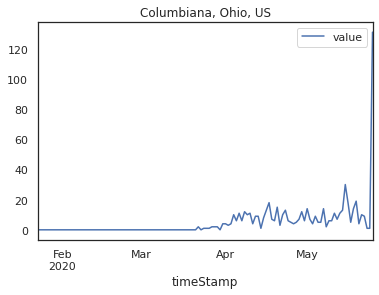

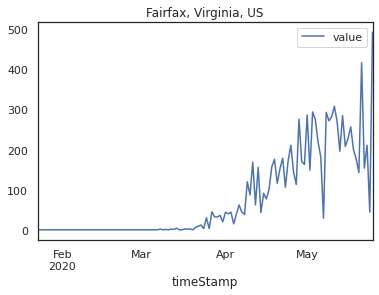

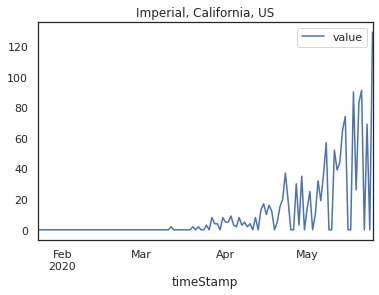

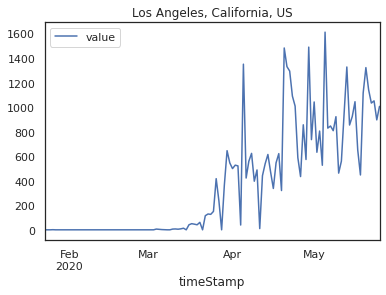

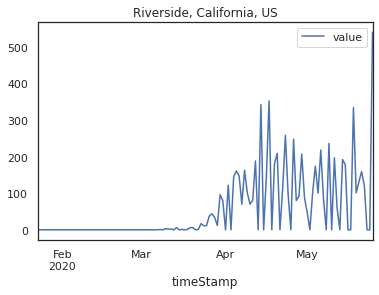

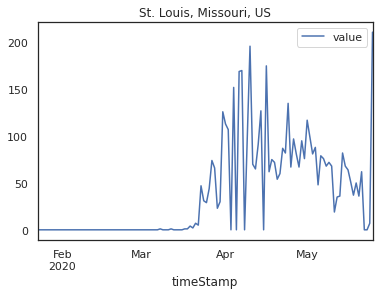

In [47]:

my_list = ts[ts['value']>100]['Country/Region'].tolist()[0:300]
bad_data = m[m['value']<0]['Country/Region'].unique().tolist()

t=m[m['Country/Region'].isin(my_list)]
t = t[~t['Country/Region'].isin(bad_data)]




t=m[m['Country/Region'].isin(my_list)]
t=t[~t['Country/Region'].isin(bad_data)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)